Evaluate Distribution at Different x

Mauricio Tombini, Jordan Jalving, and Victor M. Zavala 

University of Wisconsin-Madison, 2016

In [8]:
# Loading packages:
using JuMP 
using Distributions 
using Ipopt
using PyPlot

In [9]:
# Generate random data: 
NS = 100
S = collect(1:NS); 
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,NS);

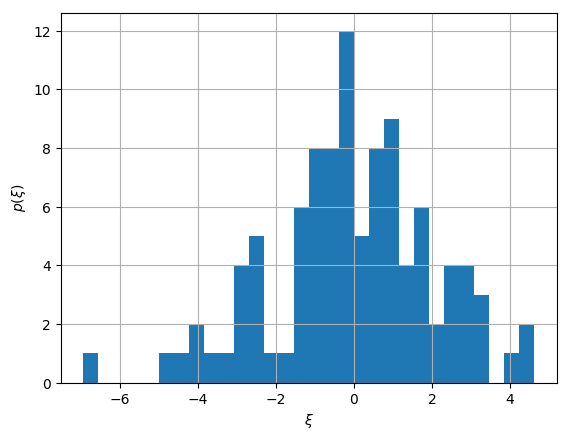

PyObject <matplotlib.text.Text object at 0x7f3aeab6cf10>

In [10]:
# Plotting data
plt[:hist](R, bins = 30);
grid("on")
xlabel(L"\xi")
ylabel(L"p(\xi)")

In [11]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)            # decision variable
@variable(m, cost[1:NS])   # per scenario cost
@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2 - R[s]*x) 
@constraint(m,fixx,x==0)
@objective(m, Min, (1/NS)*sum(cost[s] for s in S))

solve(m)
solcost = getvalue(cost);
println("x=",getvalue(x))
println("mean=",getobjectivevalue(m))
println("meanR=",(1/NS)*sum(R))

x=0.0
mean=4.420850788233845
meanR=-0.04964096309993612


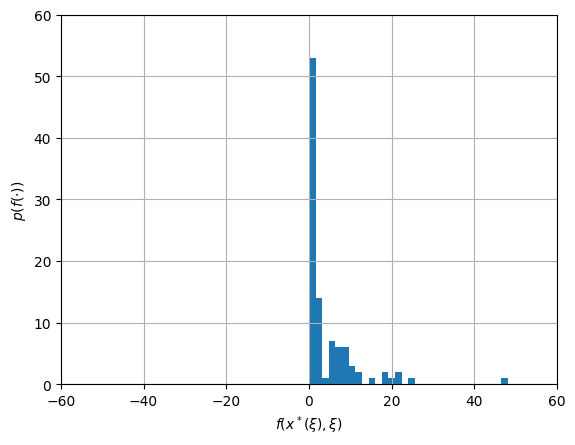

In [12]:
# Plotting cost fistribution 
plt[:hist](solcost,bins = 30)
grid("on")
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")
axis([-60, 60, 0, 60])
savefig("ex1x0.pdf")

In [13]:
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, x)            # decision variable
@variable(m, cost[1:NS])   # per scenario cost
@constraint(m, costeq[s in S], cost[s] == (x-R[s])^2 - R[s]*x) 
@constraint(m,fixx,x==5)
@objective(m, Min, (1/NS)*sum(cost[s] for s in S))

solve(m)
solcost2 = getvalue(cost);

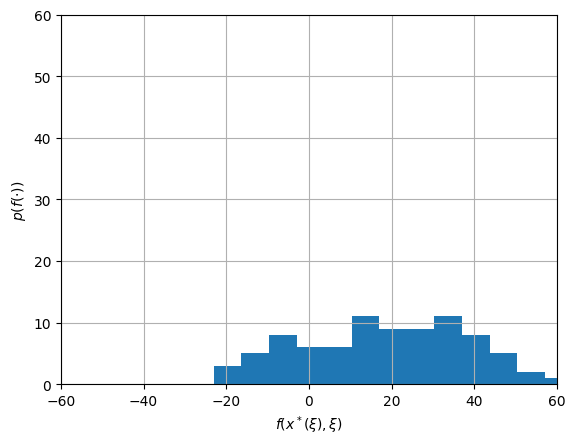

In [14]:
# Plotting cost distribution 
plt[:hist](solcost2,bins = 30)
grid("on")
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")
axis([-60, 60, 0, 60])
savefig("ex1dataxm1.pdf")